<a href="https://colab.research.google.com/github/ahmed-hassan1997/Investigate_TMDb_Movies/blob/master/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Project:  Investigate_TMDb_Movies

ahmed hassan 

- introduction

In this project, you'll go through the data analysis process and see how everything fits together. Later Nanodegree projects will focus on individual pieces of the data analysis process.

You'll use the Python libraries NumPy, pandas, and Matplotlib, which make writing data analysis code in Python a lot easier! Not only that, these are sought-after skills by employers!


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="cleaning">data cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda"> Data visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='question'></a>
## question

1- Q1: what is number of filw to director Colin Trevorrow?

2- Q2: what is the best director have high revenue?

3- Q3: what is the name of the film which have large run time?

4- q4: what is the high run time?


## include important libraries for data analysis 

In [43]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

## import data and look ahead

In [44]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [45]:
# list columns 

columns = list(df.columns)

print("number of sample is : ", str(len(df)) + " row ")

print("columns in data is \n  ",columns)

print("number of columns is : ",str(len(columns)) + " columns")


number of sample is :  10866 row 
columns in data is 
   ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
number of columns is :  21 columns


### **observation about data** 

- we need to remove unused column 
- remove duplicated data
- fill NAN value with mean of this column
- Changing  date column to date format.




In [46]:
unwanted_col = ['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj']
df.drop(unwanted_col , axis = 1 , inplace = True)

df.head(2)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [47]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

## drop duplicated

In [49]:
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  1


In [50]:
df.drop_duplicates(inplace= True)
print("sum of the duplicated data is : ", sum(df.duplicated()))

sum of the duplicated data is :  0


## fill non value with mean

In [51]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [52]:
df.replace(0,np.nan)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


In [53]:
print("sum of the null value is : ",len(df.isnull().count()))
df.isnull().sum()

sum of the null value is :  13


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

## because this data is categorical data and you want to drop it

In [54]:
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


In [56]:
print(df.shape)

(9772, 13)


## fix data format

In [57]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [58]:
date = df[['release_date','release_year']].copy()
date[['month','day','bad_year']] = date.release_date.str.split("/",expand=True) 

date.head(1)

,release_date,release_year,month,day,bad_year
0,6/9/15,2015,6,9,15


In [59]:
date.dtypes



release_date    object
release_year     int64
month           object
day             object
bad_year        object
dtype: object

In [60]:
date["release_year"] = date["release_year"].astype(str)
date.dtypes

release_date    object
release_year    object
month           object
day             object
bad_year        object
dtype: object

In [61]:
date['date'] = date['release_year'] + '-' + date['month'] + '-' + date['day']
date['date'] = pd.to_datetime(date['date'])

date.head(1)


,release_date,release_year,month,day,bad_year,date
0,6/9/15,2015,6,9,15,2015-06-09


In [62]:
date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  9772 non-null   object        
 1   release_year  9772 non-null   object        
 2   month         9772 non-null   object        
 3   day           9772 non-null   object        
 4   bad_year      9772 non-null   object        
 5   date          9772 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 534.4+ KB


In [63]:
df['release_date'] = date['date']
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9772 non-null   float64       
 1   budget                9772 non-null   int64         
 2   revenue               9772 non-null   int64         
 3   original_title        9772 non-null   object        
 4   cast                  9772 non-null   object        
 5   director              9772 non-null   object        
 6   runtime               9772 non-null   int64         
 7   genres                9772 non-null   object        
 8   production_companies  9772 non-null   object        
 9   release_date          9772 non-null   datetime64[ns]
 10  vote_count            9772 non-null   int64         
 11  vote_average          9772 non-null   float64       
 12  release_year          9772 non-null   int64         
dtypes: datetime64[ns]

## check some info about data

In [65]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [66]:
print("sum of duplicated data : " ,sum(df.duplicated()))

sum of duplicated data :  0


In [67]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [68]:
df.to_csv('clean_data.csv' ,index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (what is number of filw to director Colin Trevorrow )

In [69]:
data = df.query('director == "Colin Trevorrow"')
print("number of films which director Colin Trevorrow make : ",len(data))

number of films which director Colin Trevorrow make :  2


### Research Question 2  (what is the best director have high revenue?)



In [70]:
x = []
max_revenue = df.query(' revenue == revenue.max()')
x = list(max_revenue['director'])
print("the best director achieve large revenue is : " ,x[0])


the best director achieve large revenue is :  James Cameron


### Research Question 3 (what is the name of the film which have large run time?) 

In [71]:
max_run_time = df[df['runtime'] == df['runtime'].max()]
name = list(max_run_time['original_title'])
print("the name of the film which have large run time is : " ,name[0])



the name of the film which have large run time is :  Taken


### Research Question 4 (what is the high run time?) 

In [72]:
time = list(max_run_time['runtime'])
print("the most film have large run time is : " + str(time[0]) + " minutes")


the most film have large run time is : 877 minutes


In [73]:
df.runtime.max()

877

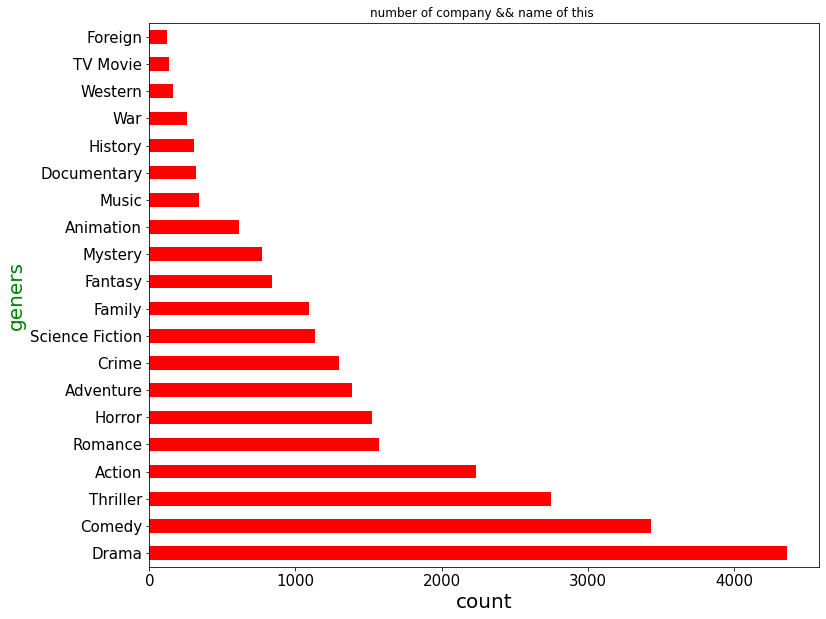

In [74]:
## split geners of films 
gener = df.genres.str.cat(sep='|')
count = pd.Series(gener.split(sep = '|'))
count1 = count.value_counts()
graph = count1.plot.barh(color = 'red', fontsize = 15)
graph.set(title = "number of company && name of this ")
graph.set_xlabel( "count" , color = 'black' ,fontsize='20' )
graph.set_ylabel( "geners",color = 'green',fontsize ='20')
graph.figure.set_size_inches(12, 10)
plt.show()

## i want to know correlation between column 
- 1 positive correlation 

- -1 negative coorelation 

- 0 symetric

In [75]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.538921,0.662405,0.156290,0.802956,0.239121,0.110944
budget,0.538921,1.000000,0.731204,0.214292,0.627068,0.096051,0.138239
revenue,0.662405,0.731204,1.000000,0.183293,0.788533,0.192026,0.071738
runtime,0.156290,0.214292,0.183293,1.000000,0.184285,0.193973,-0.133793
vote_count,0.802956,0.627068,0.788533,0.184285,1.000000,0.279851,0.124726
vote_average,0.239121,0.096051,0.192026,0.193973,0.279851,1.000000,-0.140046
release_year,0.110944,0.138239,0.071738,-0.133793,0.124726,-0.140046,1.000000


## draw heatmap
- confusion matrix between column

- this heat map show correlation between column and another 


Text(0.5, 1.0, 'correlation matrix for DataFrame')

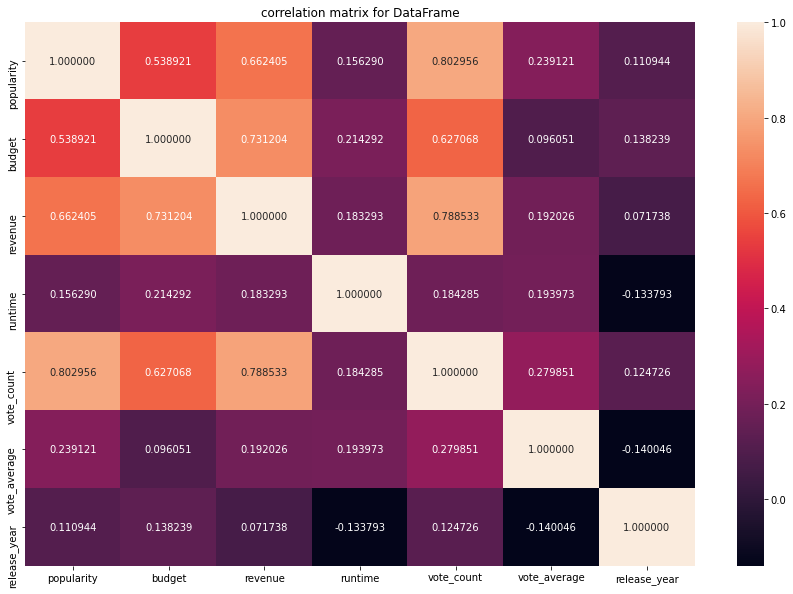

In [76]:
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(df.corr(), annot=True, fmt="f",ax=ax)
plt.title('correlation matrix for DataFrame')

<a id='conclusions'></a>
## Conclusions

### overview what happened in this project
- first read data from link dataset (10000 row) with 21 column
- i delete some column which i see it is un important 
- after this i fill value with nan value with (0)
- drop duplicated data from csv file
- check to there is no nan value in this column 
- after this i make some question and i answer to it 

